# Bitcoin prices with least squares for non-linear models
**¿Which could be the bitcoin price next week?** 

We will adjust the bitcoin price and perform a prediction using least squares for non-linear models to determine the future daily price a week ahead and then we will compare with the actual values.

Read Bitcoin data

In [22]:
using CSV
using DataFrames

#Precios del 1 de Enero a 26 de Marzo
dBit = DataFrame(CSV.File("C:/Users/felip/OneDrive/Documentos/MathML/Taller 1/Datos/Bit2022_cleaned.csv"))
dBit = dBit[:, 2:3];

#Precios del 1 de Enero a 19 de Marzo
dataBit = dBit[1:78, :];

Let's split the Bitcoin data, dBit will be the Bitcoin prices from January 1 to March 26, and dataBit will be the Bitcoin Prices from January 1 to March 19. We will use DataBit to create our model, and then compare with the prices in dataBit. 

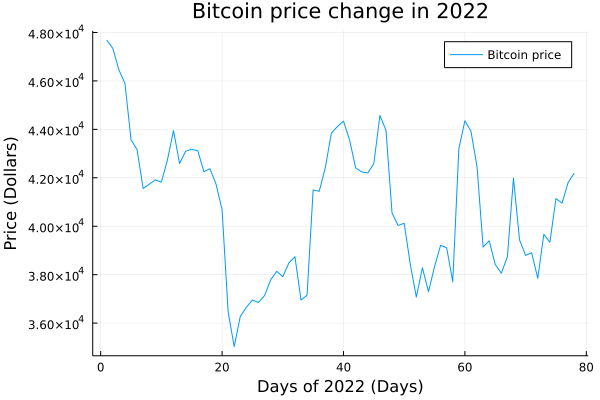

In [23]:
using Plots

plot(dataBit.PriceBit,
     title = "Bitcoin price change in 2022",
     label = "Bitcoin price",
     ylabel = "Price (Dollars)",
     xlabel = "Days of 2022 (Days)")

We want to find a function which provides the best fit. An idea can be start a with a polynomial of five  degree

$$f + ex + dx^{2} + cx^{3} + bx^{4} + ax^{5} = y$$

Points in our dataset might "satisfy" this equation (model). A particular polynomial (model) is parametrized by specific values of $a,b,c,d,e,f$. 

Therefore, given a set of prices $\{(x_i,y_i)_1^n\}$ the problem is find $a,b,c,d,e, f$ such that the following set of equations are satisfied:

$$f + ex_{i} + dx_{i}^{2} + cx_{i}^{3} + bx_{i}^{4} + ax_{i}^{5} = y_{i} \qquad 1 \le i \le n$$

This problem can be formulated as a least squares problem by specifying a proper design matrix $A$, and solve the problem by using the following formulation

$$\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$$

Now we can construct the design matrix.

In [24]:
N = size(dataBit.PriceBit,1);
x = Array((1:N));
y = dataBit.PriceBit;
A = [ones(N) x x.^2 x.^3 x.^4 x.^5]

78×6 Matrix{Float64}:
 1.0   1.0     1.0       1.0      1.0             1.0
 1.0   2.0     4.0       8.0     16.0            32.0
 1.0   3.0     9.0      27.0     81.0           243.0
 1.0   4.0    16.0      64.0    256.0          1024.0
 1.0   5.0    25.0     125.0    625.0          3125.0
 1.0   6.0    36.0     216.0   1296.0          7776.0
 1.0   7.0    49.0     343.0   2401.0         16807.0
 1.0   8.0    64.0     512.0   4096.0         32768.0
 1.0   9.0    81.0     729.0   6561.0         59049.0
 1.0  10.0   100.0    1000.0  10000.0        100000.0
 1.0  11.0   121.0    1331.0  14641.0        161051.0
 1.0  12.0   144.0    1728.0  20736.0        248832.0
 1.0  13.0   169.0    2197.0  28561.0        371293.0
 ⋮                                                ⋮
 1.0  67.0  4489.0  300763.0      2.01511e7       1.35013e9
 1.0  68.0  4624.0  314432.0      2.13814e7       1.45393e9
 1.0  69.0  4761.0  328509.0      2.26671e7       1.56403e9
 1.0  70.0  4900.0  343000.0      2.401e7   

We solve the least square problem by using the QR decomposition.

In [25]:
vhat = A\y

6-element Vector{Float64}:
 47424.04705678004
  -397.66939962860823
   -22.30742413238009
     1.6299747168649004
    -0.030243266158290483
     0.00017595378852423477

In [27]:
model = A*vhat

78-element Vector{Float64}:
 47005.67014042354
 46552.040096990924
 46071.874410269935
 45573.2069545698
 45063.40910917581
 44549.21087280394
 44036.721978055495
 43531.45300587168
 43038.33649998831
 42561.74808139036
 42105.52756276662
 41673.000062964304
 41266.99712144368
     ⋮
 39002.1678872683
 38931.683220847335
 38910.04423276021
 38946.85063090274
 39052.43318215222
 39237.87482682167
 39515.03179311438
 39896.55471157859
 40395.90972956258
 41027.399625668884
 41806.18492420853
 42748.305009656426

We plot the solution:

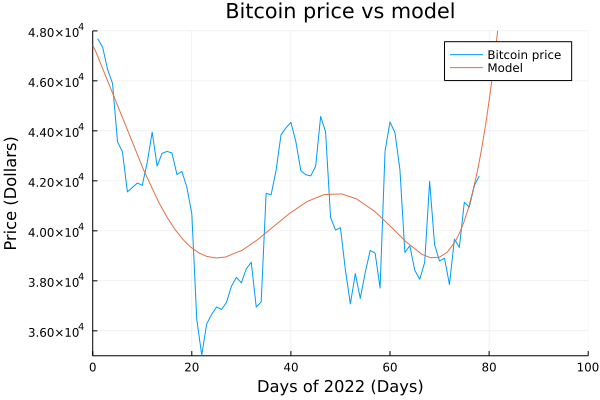

In [28]:
using Polynomials

f_model = Polynomial(vhat)
plot(x,y,
     title = "Bitcoin price vs model",
     label = "Bitcoin price",
     ylabel = "Price (Dollars)",
     xlabel = "Days of 2022 (Days)")
plot!(f_model, 
      label = "Model", 
      ylims = (35000, 48000), 
      xlims = (0,100))

We can see that our polynomial model is overfitting, therefore, it will not help us to make good predictions. We need to create a new model.

An idea can be some harmonic function

$$a + b\sin\left(\frac{π}{6}x\right) + c\cos\left(\frac{π}{2}x\right) + d\sin\left(\frac{3π}{6}x\right) + e\cos\left(\frac{3π}{2}x\right) + f\sin\left(\frac{5π}{6}x\right) + g\cos\left(\frac{5π}{2}x\right) = y$$

Points in our dataset might "satisfy" this equation (model). This particular harmonic function (model) is parametrized by specific values of $a,b,c,d,e,f,g$. 

Therefore, given a set of prices $\{(x_i,y_i)_1^n\}$ the problem is find $a,b,c,d,e,f,g$ such that the following set of equations are satisfied:

$$a + b\sin\left(\frac{π}{6}x_{i}\right) + c\cos\left(\frac{π}{2}x_{i}\right) + d\sin\left(\frac{3π}{6}x_{i}\right) + e\cos\left(\frac{3π}{2}x_{i}\right) + f\sin\left(\frac{5π}{6}x_{i}\right) + g\cos\left(\frac{5π}{2}x_{i}\right) = y_{i} \qquad 1 \le i \le n$$

This problem can be formulated as a least squares problem by specifying a proper design matrix $A$, and solve the problem by using the following formulation

$$\tilde{x} = \mbox{arg min}_{x} \| Ax - b \|_2^2$$

Now we can construct the design matrix.

In [29]:
N = size(dataBit.PriceBit,1);
x = Array((1:N));
y = dataBit.PriceBit;

ω_1 = π/6
ω_2 = π/2

A = [ones(N)  sin.(π/6*x) cos.(π/2*x)  sin.(3*π/6*x) cos.(3*π/2*x) sin.(5*π/6*x) cos.(5*π/2*x)]

78×7 Matrix{Float64}:
 1.0   0.5           6.12323e-17   1.0          …   0.5           3.06162e-16
 1.0   0.866025     -1.0           1.22465e-16     -0.866025     -1.0
 1.0   1.0          -1.83697e-16  -1.0              1.0          -2.69484e-15
 1.0   0.866025      1.0          -2.44929e-16     -0.866025      1.0
 1.0   0.5           3.06162e-16   1.0              0.5          -2.45548e-16
 1.0   1.22465e-16  -1.0           3.67394e-16  …   6.12323e-16  -1.0
 1.0  -0.5          -4.28626e-16  -1.0             -0.5          -3.91949e-15
 1.0  -0.866025      1.0          -4.89859e-16      0.866025      1.0
 1.0  -1.0           5.51091e-16   1.0             -1.0           9.79098e-16
 1.0  -0.866025     -1.0           6.12323e-16      0.866025     -1.0
 1.0  -0.5          -2.44991e-15  -1.0          …  -0.5           1.96129e-15
 1.0  -2.44929e-16   1.0          -7.34788e-16     -1.22465e-15   1.0
 1.0   0.5          -9.80336e-16   1.0              0.5           9.30917e-15
 ⋮          

We solve the least square problem by using the QR decomposition.

In [30]:
vhat = A\y

7-element Vector{Float64}:
 40735.347030797806
   913.6203884209134
     3.994609487660203e16
  -129.36457033429608
    -2.2231700320708692e16
    -0.3993979245217813
    -1.771439455589316e16

In [31]:
model = A*vhat

78-element Vector{Float64}:
 41063.69937652084
 41348.0
 41806.0804151263
 41708.0
 41139.08357859875
 40556.0
 40471.314679061376
 40124.0
 39773.67777609067
 39764.0
 40270.06213328269
 40916.0
 40951.10808252962
     ⋮
 40869.54167443928
 40124.0
 40872.34341929526
 39764.0
 40865.11599120275
 40916.0
 41550.54288568942
 41348.0
 41662.85364297975
 41708.0
 41554.96856892595
 40556.0

We plot the solution:

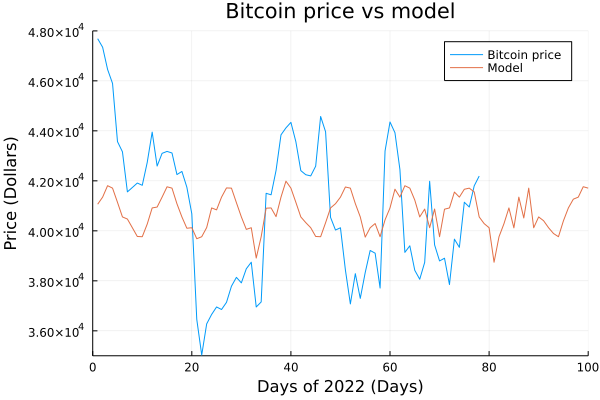

In [32]:
x = Array((1:N));

function Bitmodel(x)
    vhat[1].+vhat[2].*sin.(π/6*x).+vhat[3].*cos.(π/2*x).+vhat[4].*sin.(3*π/6*x).+vhat[5].*cos.(3*π/2*x).+vhat[6].*sin.(5*π/6*x).+vhat[7].*cos.(5*π/2*x)
end
plot(x,y,
     title = "Bitcoin price vs model",
     label = "Bitcoin price",
     ylabel = "Price (Dollars)",
     xlabel = "Days of 2022 (Days)")

x = Array((1:100));
plot!(x, Bitmodel(x),
      label = "Model", 
      ylims = (35000, 48000), 
      xlims = (0,100))

**Predictions**

We want to find an estimate of the Bitcoin price in the future.

First we will import a dataframe with the dates of 2022, and associate each Bitcoin price prediction and Bitcoin price with its respective date. 

In [33]:
Dates2022 = DataFrame(CSV.File("C:/Users/felip/OneDrive/Documentos/MathML/Taller 1/Datos/Dates2022.csv"))
Dates2022 = Dates2022[:, :2];

ModelPriceBit = Bitmodel(Array((1:365)));
modprices2022 = DataFrame("Date" => Dates2022,"ModelPriceBit" => ModelPriceBit );

In [34]:
prices = leftjoin(modprices2022 , dBit, on = :Date);

Now let's see how good our model was in the week between march 20 and march 26 with the Mean Squared Error.

In [35]:
week = prices[79:85, :]

,Date,ModelPriceBit,PriceBit
,Date,Float64,Float64?
1,2022-03-20,40288.6,41247.8
2,2022-03-21,40124.0,41078.0
3,2022-03-22,38743.3,42358.8
4,2022-03-23,39764.0,42893.0
5,2022-03-24,40284.2,43960.9
6,2022-03-25,40916.0,44348.7
7,2022-03-26,40117.6,44500.8


In [36]:
using Metrics
mseModweek = mse.(week.ModelPriceBit, week.PriceBit);
mseMod = mse.(prices.ModelPriceBit[1:78], prices.PriceBit[1:78]);

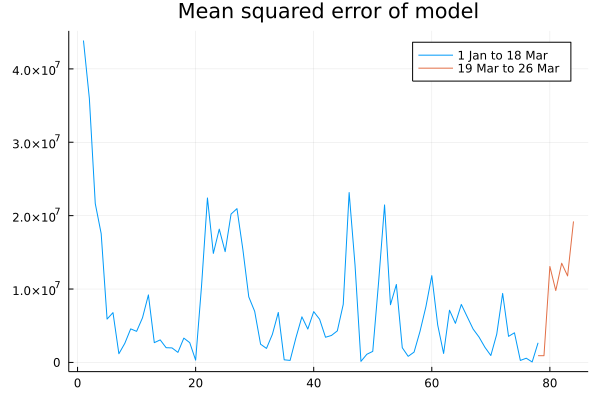

In [40]:
plot(Array((1:78)), mseMod,
     title = "Mean squared error of model",
     label = "1 Jan to 18 Mar")
plot!( Array((78:84)), mseModweek,
    label = "19 Mar to 26 Mar")